In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Load the dataset into Pandas DataFrame
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# Split the data into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Normalize the data using a scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Set up the neural network 1
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer specifying the shape
    Dense(32, activation='relu'),  # First dense layer with 32 neurons
    Dense(16, activation='relu'),  # Second dense layer with 16 neurons
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

In [27]:
# After setting up the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                288       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Train the network
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
50/50 [==============================] - 2s 16ms/step - loss: 0.6425 - accuracy: 0.6721 - val_loss: 0.6420 - val_accuracy: 0.6667
Epoch 2/50
50/50 [==============================] - 0s 6ms/step - loss: 0.5743 - accuracy: 0.7251 - val_loss: 0.5905 - val_accuracy: 0.6992
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 0.5233 - accuracy: 0.7536 - val_loss: 0.5467 - val_accuracy: 0.7561
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4905 - accuracy: 0.7576 - val_loss: 0.5210 - val_accuracy: 0.7642
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 0.4731 - accuracy: 0.7780 - val_loss: 0.5060 - val_accuracy: 0.7561
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4615 - accuracy: 0.7862 - val_loss: 0.4995 - val_accuracy: 0.7642
Epoch 7/50
50/50 [==============================] - 0s 6ms/step - loss: 0.4498 - accuracy: 0.7963 - val_loss: 0.4949 - val_accuracy: 0.7480
Epoch 8/50
50/50 [=

In [30]:
# Test with the testing dataset
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int).reshape(y_test.shape)  # Convert probabilities to binary output

5/5 [==============================] - 0s 4ms/step


In [31]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7662337662337663
Precision: 0.6792452830188679
Recall: 0.6545454545454545
F1 Score: 0.6666666666666666


###### Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

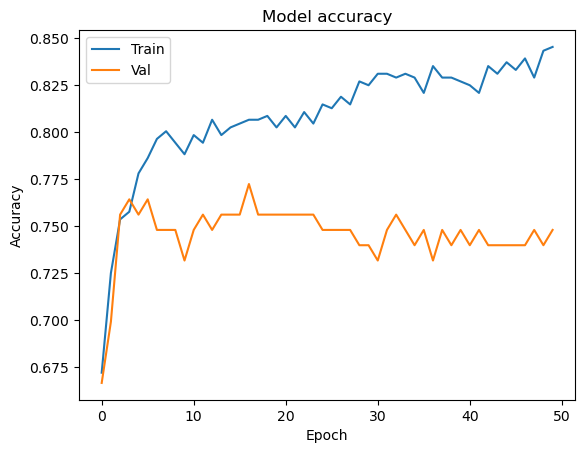

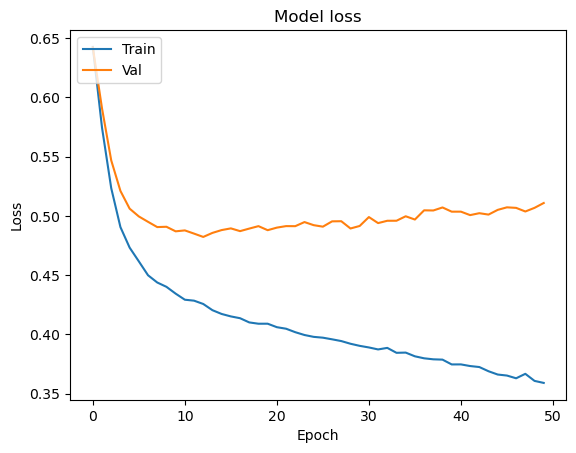

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [33]:
# Set up neural network 2 which is smaller than neural network 1
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer specifying the shape
    Dense(16, activation='relu'),  # First dense layer with 16 neurons
    Dense(8, activation='relu'),  # Second dense layer with 8 neurons
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

In [34]:
# After setting up the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# Train the network
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
50/50 [==============================] - 3s 23ms/step - loss: 0.7214 - accuracy: 0.4807 - val_loss: 0.6879 - val_accuracy: 0.5528
Epoch 2/50
50/50 [==============================] - 0s 6ms/step - loss: 0.6748 - accuracy: 0.6314 - val_loss: 0.6648 - val_accuracy: 0.6260
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 0.6467 - accuracy: 0.6843 - val_loss: 0.6463 - val_accuracy: 0.6585
Epoch 4/50
50/50 [==============================] - 0s 6ms/step - loss: 0.6180 - accuracy: 0.6843 - val_loss: 0.6236 - val_accuracy: 0.6667
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 0.5835 - accuracy: 0.7128 - val_loss: 0.5937 - val_accuracy: 0.6992
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5444 - accuracy: 0.7413 - val_loss: 0.5666 - val_accuracy: 0.7236
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5136 - accuracy: 0.7658 - val_loss: 0.5398 - val_accuracy: 0.7398
Epoch 8/50
50/50 [=

In [37]:
# Test with the testing dataset
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int).reshape(y_test.shape)  # Convert probabilities to binary output

5/5 [==============================] - 0s 4ms/step


In [38]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7142857142857143
Precision: 0.5964912280701754
Recall: 0.6181818181818182
F1 Score: 0.607142857142857


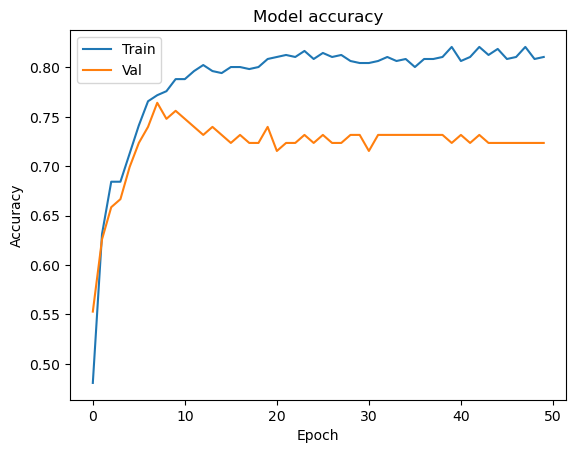

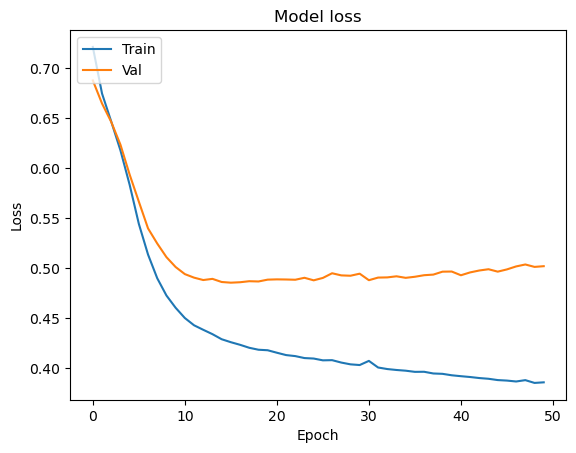

In [39]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

I made the network slightly smaller. The results are mostly the same so I will try more changes. The next change I will make is that there will be only 1 dense layer of 16 neurons.

In [40]:
# Set up neural network 3 which is smaller than neural network 1 and 2
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer specifying the shape
    Dense(16, activation='relu'),  # Dense layer with 16 neurons
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

In [41]:
# After setting up the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                144       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
# Train the network
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
50/50 [==============================] - 2s 15ms/step - loss: 0.6473 - accuracy: 0.6538 - val_loss: 0.6271 - val_accuracy: 0.6748
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5820 - accuracy: 0.7149 - val_loss: 0.5801 - val_accuracy: 0.6911
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5426 - accuracy: 0.7271 - val_loss: 0.5495 - val_accuracy: 0.7236
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5182 - accuracy: 0.7291 - val_loss: 0.5280 - val_accuracy: 0.7398
Epoch 5/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5015 - accuracy: 0.7495 - val_loss: 0.5118 - val_accuracy: 0.7398
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4918 - accuracy: 0.7597 - val_loss: 0.5051 - val_accuracy: 0.7480
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4821 - accuracy: 0.7576 - val_loss: 0.4954 - val_accuracy: 0.7561
Epoch 8/50
50/50 [=

In [44]:
# Test with the testing dataset
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int).reshape(y_test.shape)  # Convert probabilities to binary output

5/5 [==============================] - 0s 6ms/step


In [45]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7402597402597403
Precision: 0.6415094339622641
Recall: 0.6181818181818182
F1 Score: 0.6296296296296297


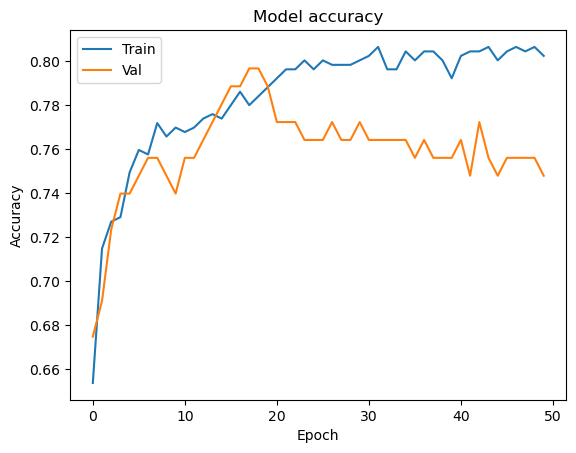

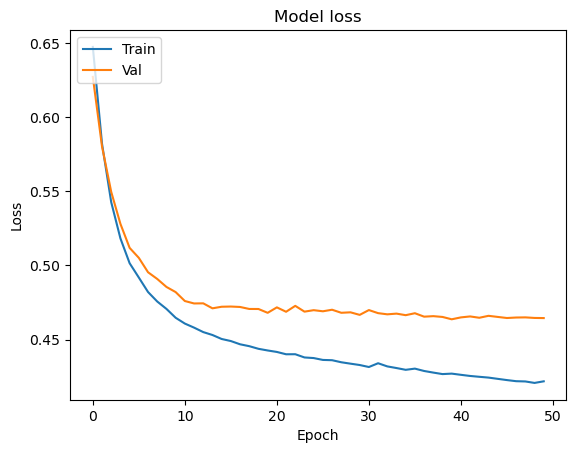

In [46]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

I made the network smaller and I see some changes when compared to the first 2 neural networks. For the accuracy plot, it looks less accurate than neural network 1 and about the same for neural network 2. However, we care more about the validation accuracy so we will take a look at that. After about 18 epochs, the validation accuracy goes as high as 80% which is better than the previous 2 neural networks. After 18 epochs, the accuracy goes down to 75% like the other two neural networks. Now we can take a look at the loss graph. There is less loss than the two previous neural networks which here is at around 47%. This means that the network has improved than the two previous neural networks. With more training there is less loss which is what we want. Next, I will make a model with only an input and output layer.

In [47]:
# Set up neural network 4 which is smaller than neural network 1,2, and 3
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer specifying the shape
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

In [48]:
# After setting up the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# Train the network
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
50/50 [==============================] - 2s 14ms/step - loss: 0.9692 - accuracy: 0.3931 - val_loss: 0.9086 - val_accuracy: 0.4309
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.9260 - accuracy: 0.4196 - val_loss: 0.8738 - val_accuracy: 0.4553
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.8863 - accuracy: 0.4420 - val_loss: 0.8420 - val_accuracy: 0.5122
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: 0.8503 - accuracy: 0.4705 - val_loss: 0.8130 - val_accuracy: 0.5285
Epoch 5/50
50/50 [==============================] - 0s 5ms/step - loss: 0.8181 - accuracy: 0.5010 - val_loss: 0.7879 - val_accuracy: 0.5447
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.7887 - accuracy: 0.5316 - val_loss: 0.7633 - val_accuracy: 0.5366
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.7606 - accuracy: 0.5662 - val_loss: 0.7427 - val_accuracy: 0.5691
Epoch 8/50
50/50 [=

In [51]:
# Test with the testing dataset
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int).reshape(y_test.shape)  # Convert probabilities to binary output

5/5 [==============================] - 0s 3ms/step


In [52]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7077922077922078
Precision: 0.5961538461538461
Recall: 0.5636363636363636
F1 Score: 0.5794392523364486


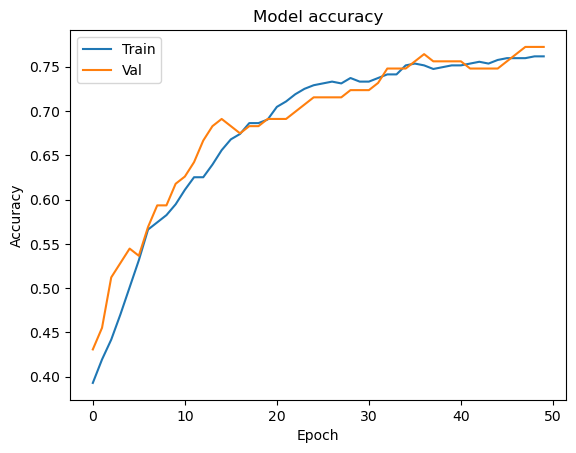

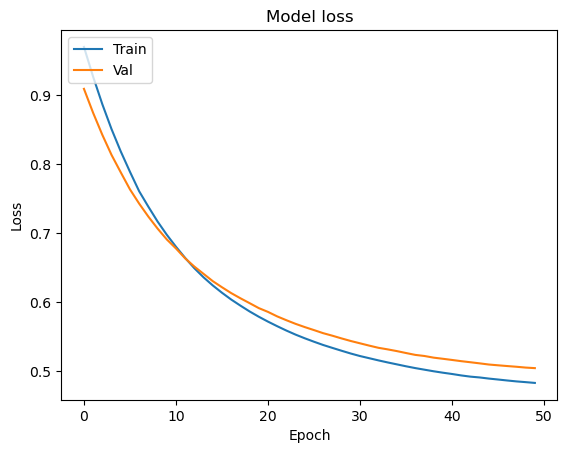

In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

We see some major changes now that the neural network only has an input and output layer. We see that the accuracy of both the training and validation data gradually increases after more epochs. This means that more training leads to more accuracy which is what we want and see from the validation data. This could mean that this size of neural network fits the data pretty well. We also see this from the loss training and validation graph. As more epochs are performed, the loss decreases for both the train and val set which is what we want. The last neural network I will make is one with three dense layers which I expect will overfit the data.

In [54]:
# Set up the neural network 5 which is the largest of the 5
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer specifying the shape
    Dense(32, activation='relu'),  # First dense layer with 32 neurons
    Dense(16, activation='relu'),  # Second dense layer with 16 neurons
    Dense(8, activation = 'relu'), # Third dense layer with 8 neurons
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

In [55]:
# After setting up the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                288       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 1)                 9         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
# Train the network
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
50/50 [==============================] - 2s 16ms/step - loss: 0.6442 - accuracy: 0.6762 - val_loss: 0.6233 - val_accuracy: 0.6585
Epoch 2/50
50/50 [==============================] - 0s 6ms/step - loss: 0.5715 - accuracy: 0.7230 - val_loss: 0.5667 - val_accuracy: 0.6585
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 0.5125 - accuracy: 0.7413 - val_loss: 0.5225 - val_accuracy: 0.6911
Epoch 4/50
50/50 [==============================] - 0s 6ms/step - loss: 0.4788 - accuracy: 0.7617 - val_loss: 0.4890 - val_accuracy: 0.7154
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 0.4594 - accuracy: 0.7821 - val_loss: 0.4774 - val_accuracy: 0.7480
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4487 - accuracy: 0.7760 - val_loss: 0.4692 - val_accuracy: 0.7398
Epoch 7/50
50/50 [==============================] - 0s 6ms/step - loss: 0.4377 - accuracy: 0.7780 - val_loss: 0.4636 - val_accuracy: 0.7480
Epoch 8/50
50/50 [=

In [58]:
# Test with the testing dataset
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int).reshape(y_test.shape)  # Convert probabilities to binary output

5/5 [==============================] - 0s 3ms/step


In [59]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7467532467532467
Precision: 0.6538461538461539
Recall: 0.6181818181818182
F1 Score: 0.6355140186915889


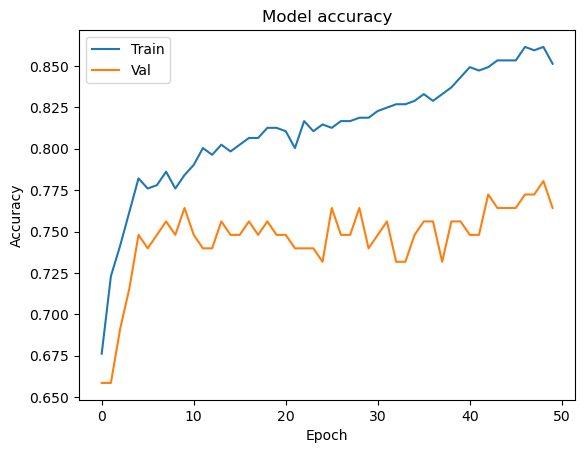

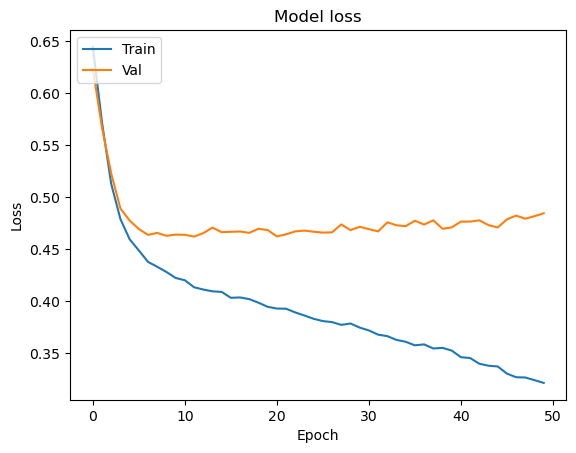

In [60]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

I see some changes when compared to the previous 4 neural networks. The first change is that the training accuracy is larger, but the validation accuracy is about the same. This could signal that the model is overfitting the data which is what I expected. The loss graph also supports this conclusion. The loss of the training data is decreasing while the loss of the validation data is remains about constant. Taking a look at the accuracy and loss plots as the size of the network changes gives us insight into the training process. We have both the training and validation data, but we are more interested in the validation data to see how well the model performs. If the model is a good fit for the data, then both the accuracy of the training and validation set will increase. In addition, the loss will decrease for both which is what we saw before with neural network 4. Thus, the training process will reveal how well our model fits the data.